In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from astropy.io import fits
from matplotlib.colors import LogNorm

In [89]:
r=requests.get('https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9/north/survey-bricks-dr9-north.fits.gz')
hdul=r.content
with open('survey-bricks-dr9-north.fits.gz', 'wb') as f:
    f.write(r.content)
hdul=fits.open('survey-bricks-dr9-north.fits.gz')
hdul.info()
hdu=hdul[1]
hdu.header

Filename: survey-bricks-dr9-north.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    110   93548R x 51C   [8A, D, D, I, I, I, 6J, 6J, 6J, J, J, J, J, J, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 4I, 4E, E, E, E, E, J, D, D, D, D, D, L, L]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  300 / width of table in bytes                        
NAXIS2  =                93548 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   51 / number of fields in each row                   
TTYPE1  = 'brickname'          / label for field   1                            
TFORM1  = '8A      '           / data format of field: ASCII Character          
TTYPE2  = 'ra      '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'dec     '        

In [92]:
bricks=hdul[1].data
brick_name=bricks['brickname']
ra1=bricks['ra1']
dec1=bricks['dec1']
ra2=bricks['ra2']
dec2=bricks['dec2']
primary=bricks['survey_primary']

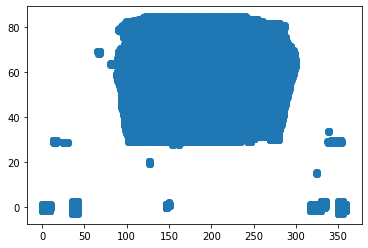

In [93]:
plt.scatter(ra1,dec1)

In [2]:
from astropy.io import fits
hdul = fits.open('tractor-0001m002.fits')

In [73]:
r=requests.get('https://www.legacysurvey.org/viewer/cutout.fits?ra=166.1136&dec=38.2077&layer=ls-dr9&pixscale=1.00')
hdul=r.content
with open('image.fits', 'wb') as f:
    f.write(r.content)
    
r=requests.get('https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9/north/tractor/166/tractor-1661p382.fits')
hdul=r.content
with open('catalog.fits', 'wb') as f:
    f.write(r.content)



In [38]:
hdul=fits.open('image.fits')
b=hdul[0]

In [47]:
image=hdul[0].data


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

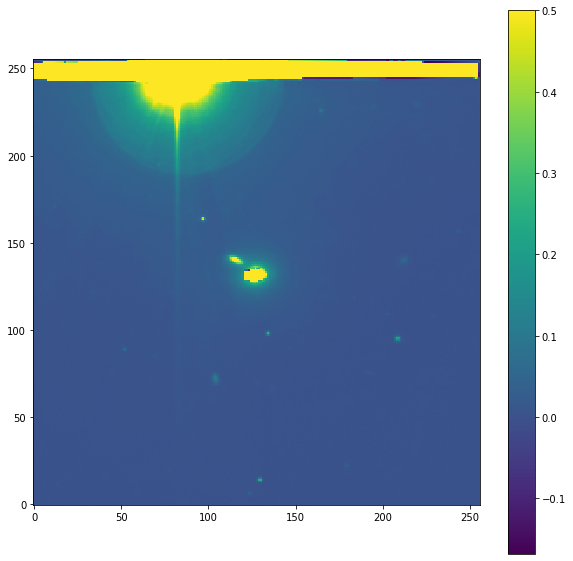

In [55]:
    gi = (image[0])
    ri = (image[1])
    zi = (image[2])
    fig, ax = plt.subplots(figsize=(10,10))
    plt.imshow(gi,interpolation='none',origin ='lower',aspect='equal',vmax=0.5)
    plt.colorbar()



In [71]:
hdul=fits.open('catalog.fits')
hdul.info()
cat=hdul[1].data
ra=cat['ra']
dec=cat['dec']
mjd_min=cat['mjd_min']
mjd_max=cat['mjd_max']
flux_z=cat['flux_z']



Filename: catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     225   ()      
  1                1 BinTableHDU    447   3709R x 181C   [I, J, 8A, J, L, I, I, 3A, D, D, E, E, E, E, 5E, E, D, D, 2A, K, E, E, E, E, E, E, E, E, E, I, E, E, I, E, E, I, L, E, E, I, I, E, L, E, E, E, E, B, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, B, B, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, E, E, 15E, 15E, 15E, 15E, 15I, 15I, 15E, 15E, 15E, 15E, 15D, 15D, 15I, 15I, E, E, E, E, E, E, E, E]   


In [60]:
ra=cat['ra']
dec=cat['dec']
mjd_min=cat['mjd_min']
mjd_max=cat['mjd_max']
flux_z=cat['flux_z']


lc_flux_w1=cat['lc_flux_w1'] # ! there is a lightcurve here
lc_flux_ivar_w1=cat['lc_flux_ivar_w1'] # this is the variance of the lc measurements
lc_mjd_w1=cat['lc_mjd_w1'] # here are the time moments of the LC


flux_z_var=cat['flux_ivar_z']
Nsources=len(ra)
print(Nsources)
for i in range(Nsources):
    if(ra[i]>300):
        ra[i]=ra[i]-360

3709


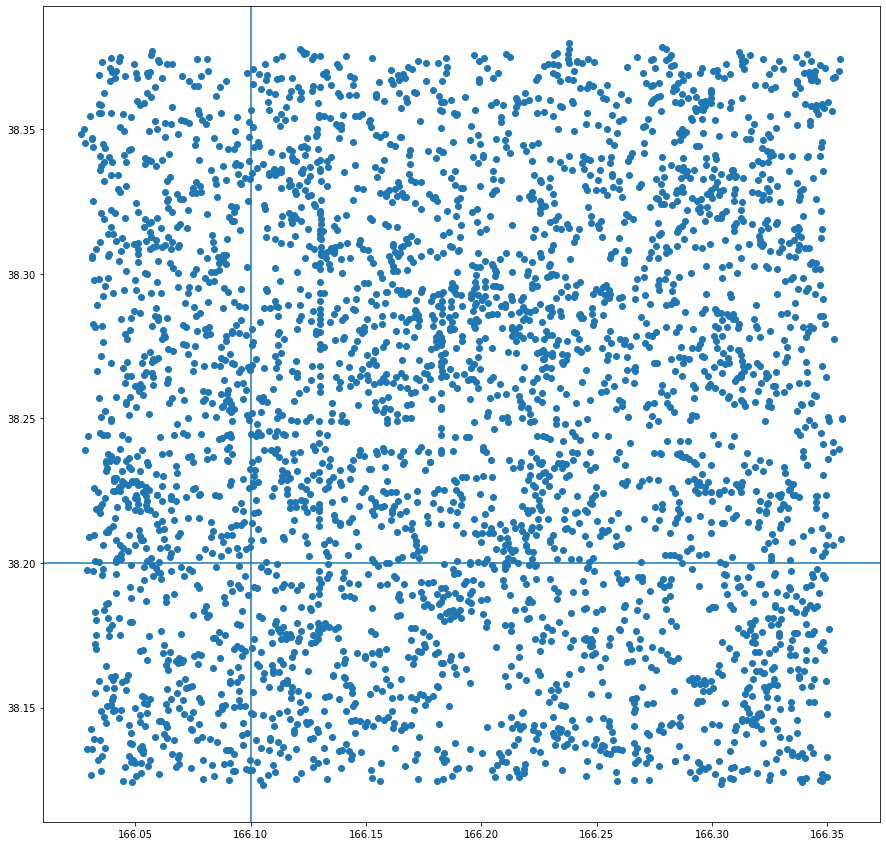

In [67]:
plt.figure(figsize=(15,15))
plt.scatter(ra,dec)
plt.axvline(166.1)
plt.axhline(38.2)

Filename: catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     225   ()      
  1                1 BinTableHDU    447   3709R x 181C   [I, J, 8A, J, L, I, I, 3A, D, D, E, E, E, E, 5E, E, D, D, 2A, K, E, E, E, E, E, E, E, E, E, I, E, E, I, E, E, I, L, E, E, I, I, E, L, E, E, E, E, B, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, B, B, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, E, E, 15E, 15E, 15E, 15E, 15I, 15I, 15E, 15E, 15E, 15E, 15D, 15D, 15I, 15I, E, E, E, E, E, E, E, E]   
Filename: catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     225   ()      
  1                1 BinTableHDU    447   4004R x 181C   [I, J, 

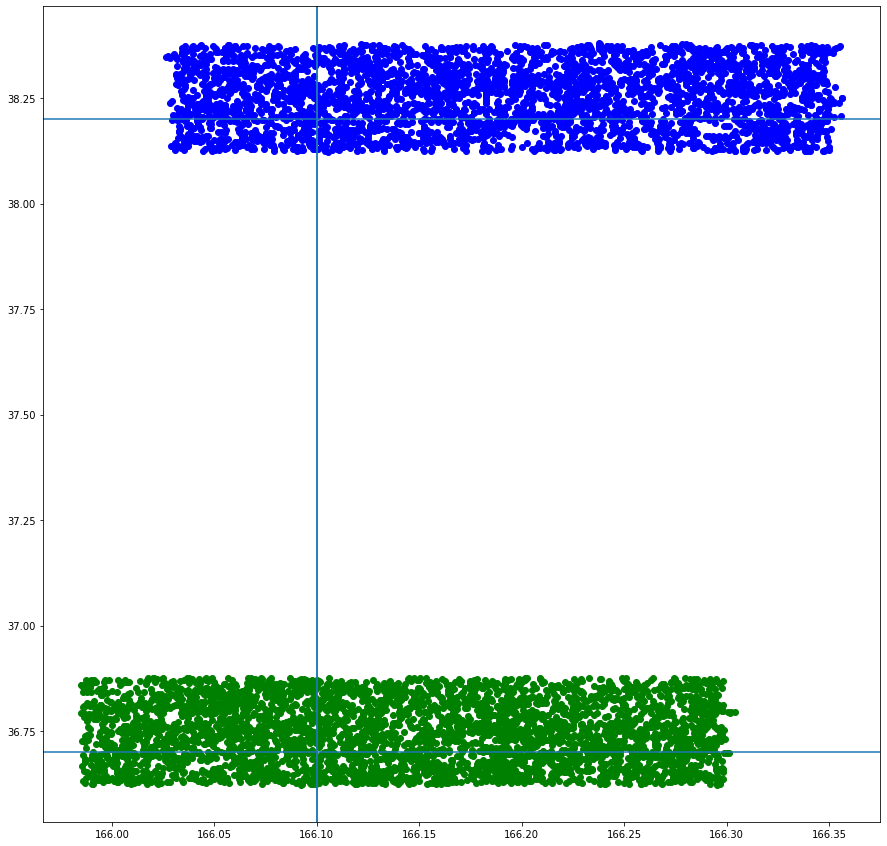

In [76]:
plt.figure(figsize=(15,15))

r=requests.get('https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9/north/tractor/166/tractor-1661p382.fits')
hdul=r.content
with open('catalog.fits', 'wb') as f:
    f.write(r.content)
hdul=fits.open('catalog.fits')
hdul.info()
cat=hdul[1].data
ra=cat['ra']
dec=cat['dec']
plt.scatter(ra,dec,color='blue')

plt.axvline(166.1)
plt.axhline(38.2)

r=requests.get('https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9/north/tractor/166/tractor-1661p367.fits')
hdul=r.content
with open('catalog.fits', 'wb') as f:
    f.write(r.content)
hdul=fits.open('catalog.fits')
hdul.info()
cat=hdul[1].data
ra1=cat['ra']
dec1=cat['dec']

plt.scatter(ra1,dec1,color='green')

plt.axvline(166.1)
plt.axhline(36.7)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.99683034e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.53349400e+00, 0.00000000e+00, ...,
         1.57777197e+03, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.09335569e+00, 7.76697159e-01, 0.00000000e+00, ...,
         1.09736748e+01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 2.95308137e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.82299948e-01, 0.00000000e+00, 0.00000000e+00]]),
 array([166.02629418, 166.02959341, 166.03289265, 166.03619188,
        166.03949111, 166.04279034, 166.04608958, 166.04938881,
        166.05268804, 166.05598727, 166.0592865 , 166.06258574,
        166.06588497, 166.0691842 , 166.07248343, 166.07578266,
        1

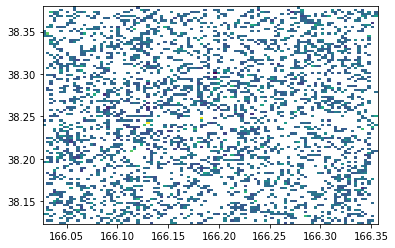

In [62]:
from matplotlib.colors import LogNorm

plt.hist2d(ra, dec,weights=flux_z,bins=(100),norm=LogNorm())